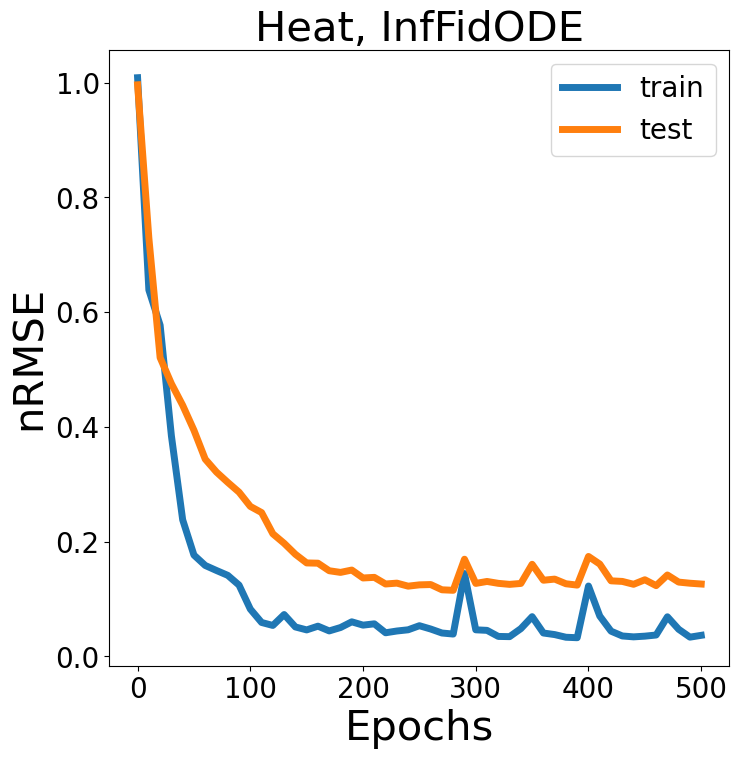

In [5]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size":20,
})

domain = 'Heat'
# method = 'InfFidGPT'
method = 'InfFidODE'
rank = 5
fold = 0
epochs = 500
interval = 10
hf = 64

res_pkl = os.path.join(
    '__res__', domain, method, 
    'base{}'.format(rank),
    'fold{}'.format(fold),
    'error_epoch{}.pickle'.format(int(epochs/10))
)

with open(res_pkl, 'rb') as handle:
    errs_dict = pickle.load(handle)

hist_nrmse_tr = []
hist_nrmse_te = []

for ie in range(int(epochs/10)+1):
    nrmse_tr = errs_dict['hist_rmse_list_tr'][ie*10][hf]
    nrmse_te = errs_dict['hist_rmse_list_te'][ie*10][hf]
    hist_nrmse_tr.append(nrmse_tr)
    hist_nrmse_te.append(nrmse_te)
#

hist_nrmse_tr = np.array(hist_nrmse_tr)
hist_nrmse_te = np.array(hist_nrmse_te)
hist_epochs = np.arange(0,epochs+1,10)

fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(hist_epochs, hist_nrmse_tr, label='train', linewidth=5)
plt.plot(hist_epochs, hist_nrmse_te, label='test', linewidth=5)


plt.title('{}, {}'.format(domain, method), fontsize=30)
plt.xlabel('Epochs', fontsize=30)
plt.ylabel('nRMSE', fontsize=30)
plt.legend()


figure_name = 'rmse_heat_{}.png'.format(method)
plt.savefig(os.path.join(figure_name),bbox_inches='tight')

